In [30]:
import numpy
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch.cuda as cuda

In [31]:
datasets.CIFAR10.train_list

[['data_batch_1', 'c99cafc152244af753f735de768cd75f'],
 ['data_batch_2', 'd4bba439e000b95fd0a9bffe97cbabec'],
 ['data_batch_3', '54ebc095f3ab1f0389bbae665268c751'],
 ['data_batch_4', '634d18415352ddfa80567beed471001a'],
 ['data_batch_5', '482c414d41f54cd18b22e5b47cb7c3cb']]

In [32]:
use_gpu = torch.cuda.is_available()

In [55]:
# define transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2 )

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2 )

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


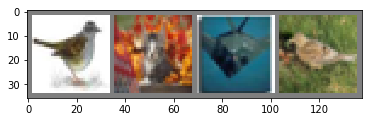

 bird   cat plane  bird


In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    
    img = img/2 + 0.5 # unnormalize
    npimg = img.numpy()
#     Permute the axes 
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.
imshow(torchvision.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(len(labels))))

In [66]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        
        x = x.view(-1, self.num_of_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
        
    def num_of_flat_features(self, x):
        size = x.size()[1:]
        
        num_features = 1
        
        for i in size:
            num_features *= i
        return num_features

In [67]:
net = Net()
print(net)

Net(
  (conv1): Conv2d (3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


In [68]:
for i in range(len(list(net.parameters()))):
    print(list(net.parameters())[i].size())

torch.Size([6, 3, 5, 5])
torch.Size([6])
torch.Size([16, 6, 5, 5])
torch.Size([16])
torch.Size([120, 400])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])


In [69]:
# sanity test
input = Variable(torch.randn(1, 3, 32, 32))
if use_gpu:
    net = net.cuda()
    input = input.cuda()
# print(input)
(net(input))

Variable containing:
-0.0129  0.0317 -0.1573 -0.0826  0.0281  0.0341  0.0255  0.0988 -0.0220 -0.0390
[torch.cuda.FloatTensor of size 1x10 (GPU 0)]

In [74]:
# Optimization
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [79]:
# training

def train():
    for epoch in range(5):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0): # stars from 0
            inputs, labels = data

            if use_gpu:
                inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
            else:
                inputs, labels = Variable(inputs), Variable(labels)

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.data[0]

            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    print('Finished Training')



In [80]:
train()

[1,  2000] loss: 1.888
[1,  4000] loss: 1.603
[1,  6000] loss: 1.509
[1,  8000] loss: 1.433
[1, 10000] loss: 1.382
[1, 12000] loss: 1.371
[2,  2000] loss: 1.286
[2,  4000] loss: 1.279
[2,  6000] loss: 1.250
[2,  8000] loss: 1.249
[2, 10000] loss: 1.220
[2, 12000] loss: 1.208
[3,  2000] loss: 1.136
[3,  4000] loss: 1.144
[3,  6000] loss: 1.141
[3,  8000] loss: 1.152
[3, 10000] loss: 1.128
[3, 12000] loss: 1.160
[4,  2000] loss: 1.056
[4,  4000] loss: 1.092
[4,  6000] loss: 1.070
[4,  8000] loss: 1.088
[4, 10000] loss: 1.064
[4, 12000] loss: 1.075
[5,  2000] loss: 1.000
[5,  4000] loss: 0.986
[5,  6000] loss: 1.020
[5,  8000] loss: 1.040
[5, 10000] loss: 1.043
[5, 12000] loss: 1.034
Finished Training


In [82]:
correct = 0
total = 0

for data in testloader:
    images, labels = data
    if use_gpu: 
        outputs = net(Variable(images.cuda()))
        labels = labels.cuda()
    else: outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print("Accuracy: ", 100*correct/total, "%")

Accuracy:  68.272 %


way better than 10% so the model is working and requires more training